<a href="https://colab.research.google.com/github/SophistryDude/DS-Unit-2-Linear-Models/blob/master/module2-regression-2/Nick_M's_Copy_of_LS_DS_212_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 2*

---

# Regression 2

## Assignment

You'll continue to **predict how much it costs to rent an apartment in NYC,** using the dataset from renthop.com.

- [ ] Do train/test split. Use data from April & May 2016 to train. Use data from June 2016 to test.
- [ ] Engineer at least two new features. (See below for explanation & ideas.)
- [ ] Fit a linear regression model with at least two features.
- [ ] Get the model's coefficients and intercept.
- [ ] Get regression metrics RMSE, MAE, and $R^2$, for both the train and test data.
- [ ] What's the best test MAE you can get? Share your score and features used with your cohort on Slack!
- [ ] As always, commit your notebook to your fork of the GitHub repo.


#### [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)

> "Some machine learning projects succeed and some fail. What makes the difference? Easily the most important factor is the features used." — Pedro Domingos, ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)

> "Coming up with features is difficult, time-consuming, requires expert knowledge. 'Applied machine learning' is basically feature engineering." — Andrew Ng, [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf) 

> Feature engineering is the process of using domain knowledge of the data to create features that make machine learning algorithms work. 

#### Feature Ideas
- Does the apartment have a description?
- How long is the description?
- How many total perks does each apartment have?
- Are cats _or_ dogs allowed?
- Are cats _and_ dogs allowed?
- Total number of rooms (beds + baths)
- Ratio of beds to baths
- What's the neighborhood, based on address or latitude & longitude?

## Stretch Goals
- [ ] If you want more math, skim [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
- [ ] If you want more introduction, watch [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)
(20 minutes, over 1 million views)
- [ ] Add your own stretch goal(s) !

In [ ]:
%%capture
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'
    !pip install category_encoders==2.*

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Read New York City apartment rental listing data
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv', index_col= 'created', parse_dates=['created'])
assert df.shape == (49352, 33)

# Remove the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= np.percentile(df['price'], 0.5)) & 
        (df['price'] <= np.percentile(df['price'], 99.5)) & 
        (df['latitude'] >= np.percentile(df['latitude'], 0.05)) & 
        (df['latitude'] < np.percentile(df['latitude'], 99.95)) &
        (df['longitude'] >= np.percentile(df['longitude'], 0.05)) & 
        (df['longitude'] <= np.percentile(df['longitude'], 99.95))]

In [ ]:
# Let's get an idea of what the date column looks like 
df.head()

,bathrooms,bedrooms,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
created,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2016-06-24 07:54:24,1.5,3,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-06-12 12:19:27,1.0,2,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-17 03:26:41,1.0,1,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-18 02:22:02,1.0,1,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2016-04-28 01:32:41,1.0,4,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# What's the neighborhood, based on latitude & longitude?

In [ ]:
y = df['price']
x = df[['latitude', 'longitude']]
cutoff = '2016-06'
mask = x.index < cutoff
x_train = x.loc[mask]
y_train = y.loc[mask]
x_val, y_val = x.loc[~mask], y.loc[~mask]
#df.loc['2016-06-01':'2016-06-31']

In [ ]:
y_train.mean()

3575.604007034292

Baseline MAE: 1201.8811133682555


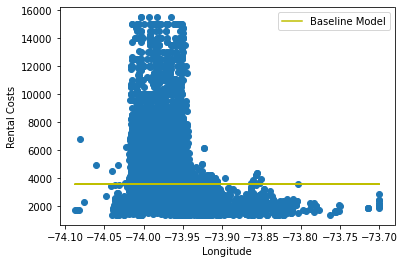

In [ ]:
col = 'longitude'
y_pred = [y_train.mean()]*len(x_train)
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))
plt.scatter(x_train[col], y_train)
plt.plot(x_train[col], y_pred, color='y', label='Baseline Model')
plt.xlabel('Longitude')
plt.ylabel('Rental Costs')
plt.legend()

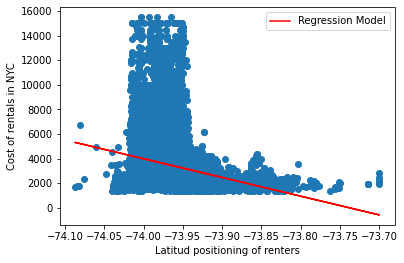

In [ ]:
model = LinearRegression()
model.fit(x_train[[col]], y_train)
y_pred = model.predict(x_train[[col]])
col = 'longitude'
plt.scatter(x_train[col], y_train)
plt.plot(x_train[col], y_pred, color='r', label='Regression Model')
plt.xlabel('Latitud positioning of renters')
plt.ylabel('Cost of rentals in NYC')
plt.legend()


In [ ]:
print('Training MAE:', mean_absolute_error(y_train, model.predict(x_train[[col]])))
print('Validation MAE:', mean_absolute_error(y_val, model.predict(x_val[[col]])))

Training MAE: 1144.7205402880543
Validation MAE: 1138.5251093291272


In [ ]:
print('Training RMSE:', mean_squared_error(y_train, model.predict(x_train[[col]]), squared=False))
print('Validation RMSE:', mean_squared_error(y_val, model.predict(x_val[[col]]), squared=False))

Training RMSE: 1706.1131324528765
Validation RMSE: 1705.791637556724


In [ ]:
print('Training R2:', model.score(x_train[[col]], y_train))
print('Validation R2:', model.score(x_val[[col]], y_val))

Training R2: 0.06254571087117833
Validation R2: 0.0638014157577248


In [ ]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print('Training R2:', model.score(x_train, y_train))
print('Training R2:', model.score(x_val, y_val))

Training R2: 0.06463820907125306
Training R2: 0.06677485649195447


# Are cats and dogs allowed?

In [ ]:
y = df['price']
x = df[['cats_allowed', 'dogs_allowed']]
cutoff = '2016-06'
mask = x.index < cutoff
x_train = x.loc[mask]
y_train = y.loc[mask]
x_val, y_val = x.loc[~mask], y.loc[~mask]

Baseline MAE: 1201.8811133682555


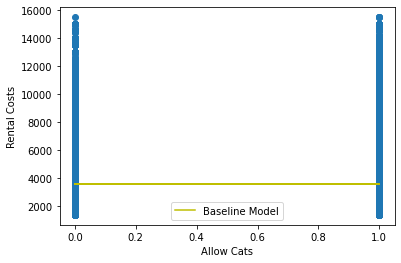

In [ ]:
col = 'cats_allowed'
y_pred = [y_train.mean()]*len(x_train)
print('Baseline MAE:', mean_absolute_error(y_train, y_pred))
plt.scatter(x_train[col], y_train)
plt.plot(x_train[col], y_pred, color='y', label='Baseline Model')
plt.xlabel('Allow Cats')
plt.ylabel('Rental Costs')
plt.legend()

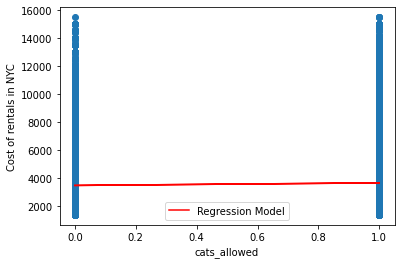

In [ ]:
model = LinearRegression()
model.fit(x_train[[col]], y_train)
y_pred = model.predict(x_train[[col]])
col = 'cats_allowed'
plt.scatter(x_train[col], y_train)
plt.plot(x_train[col], y_pred, color='r', label='Regression Model')
plt.xlabel('cats_allowed')
plt.ylabel('Cost of rentals in NYC')
plt.legend()

The models are the same because these are dichotomies, not a regression. 

In [ ]:
print('Training MAE:', mean_absolute_error(y_train, model.predict(x_train[[col]])))
print('Validation MAE:', mean_absolute_error(y_val, model.predict(x_val[[col]])))
print('Training RMSE:', mean_squared_error(y_train, model.predict(x_train[[col]]), squared=False))
print('Validation RMSE:', mean_squared_error(y_val, model.predict(x_val[[col]]), squared=False))
print('Training R2:', model.score(x_train[[col]], y_train))
print('Validation R2:', model.score(x_val[[col]], y_val))
print('Training R2:', model.score(x_train, y_train))
print('Training R2:', model.score(x_val, y_val))

Training MAE: 1198.2932176523789
Validation MAE: 1194.6049925156497
Training RMSE: 1759.7096629682883
Validation RMSE: 1760.7825304053765
Training R2: 0.0027214309675465116
Validation R2: 0.0024665688588091372


ValueError: ignored